In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas
import contextily as cx
import folium
import pickle
import os

In [3]:
type_dict = {
    "residential":[
        'residential',
        'Accommodation',
        'Other buildings',
        'roof',
        'dormitory',
                   ],
    
    "industrial":[
        'industrial'
        ],
    
    "commercial":[
        'commercial',
        'public',
        'mall',
        'Commercial'
                  ],
    
    "agricultural":[
        'greenhouse',
        'Agricultural/plant production'
        ],
    
    "religious":['religious'],
    
    "civic":[
        'office',
        'hospital',
        'Civic/amenity',
        'civic'
        ],
    
    "school":[
        'school',
        'kindergarten',
        'university'
        ],

    "sports":["stadium"]
}

type_dict_2 ={
    "residential":['residential'],
    "industrial":['industrial'],
    "commercial":['commercial'],
    "others":['civic','school','sports','agricultural','religious'],
}

In [4]:
type_dict_re = {}
for i, (k, v) in enumerate(type_dict.items()):
    for j in v:
        type_dict_re[j] = k
type_dict2_re = {}
for i, (k, v) in enumerate(type_dict_2.items()):
    for j in v:
        type_dict2_re[j] = k

In [5]:
cities = [
    "Ordu",
    "Manisa",
    
    # 'Adana',
    # 'Cairo',
    # 'Trabzon',
    # 'Johannesburg',
]

(18530, 9)
(30395, 9)


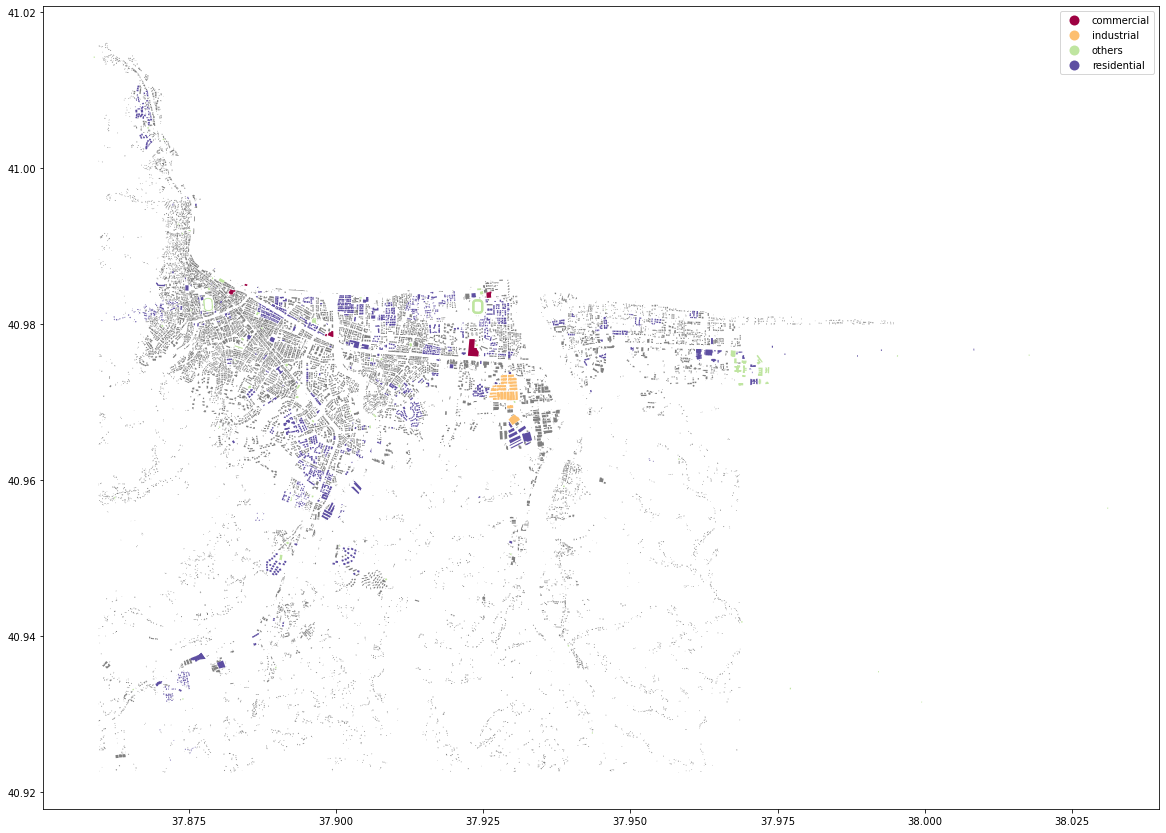

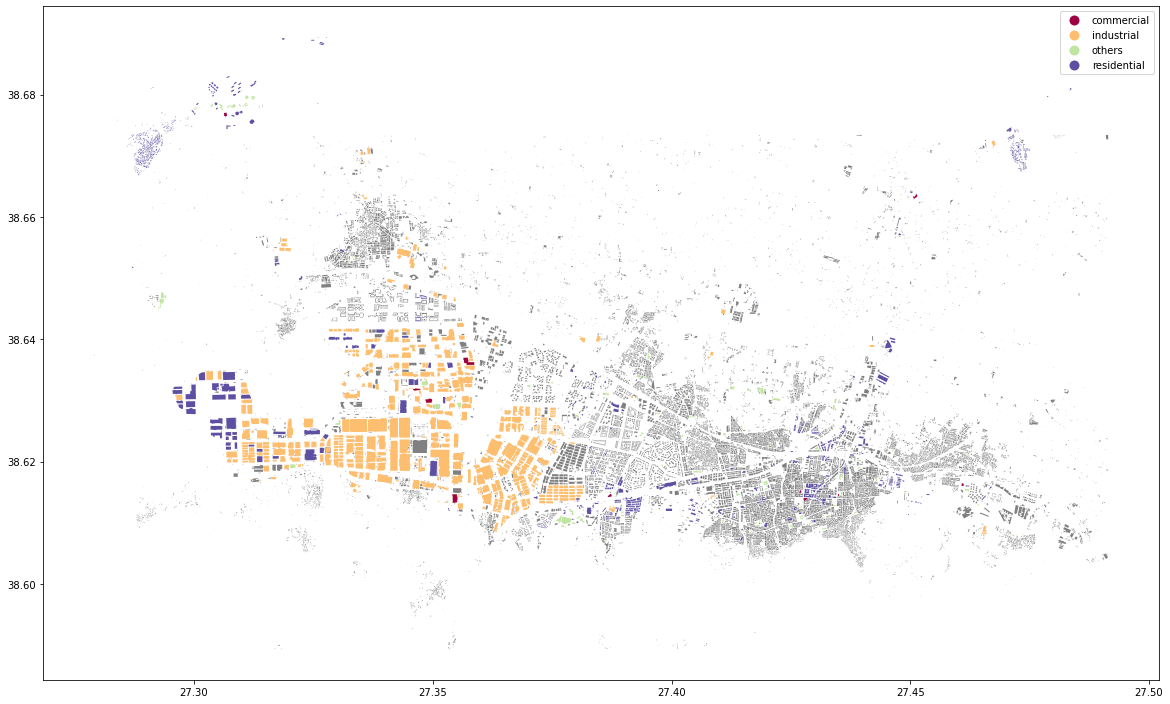

In [6]:
for c in cities:
    df_path = os.path.join('data','OSM_combined',f'{c}_combined_osm_ms.pkl')
    df = pickle.load(open(df_path,"rb"))
    df["source"] = "OSM"
    df.loc[(df["height"].isna())&(df["type"].isna())&(df["category"].isna())&(df["tags"].isna()), "source"]="MS"

    df = df.dropna(axis=1, how='all')
    df["density"]=1

    df["type_level_0"] = df["type"]
    df.loc[df["type"]=="way","type_level_0"]=df.loc[df["type"]=="way","category"]


    df= geopandas.GeoDataFrame(df)
    df = df.set_crs("EPSG:4326", allow_override=True)

    df = df.to_crs("EPSG:3395")
    df["area"] = df.area
    df = df.to_crs("EPSG:4326")

    df=df[["height","orient","type_level_0",  "density","area", "source", "geometry",]]

    df['type_level_1'] = df['type_level_0'].map(type_dict_re) 
    df['type_level_2'] = df['type_level_1'].map(type_dict2_re) 
    
    ax = df[df["source"]=="MS"].plot(color="grey", figsize=(20,18))
    ax = df.plot(column="type_level_2", figsize=(20,18), ax=ax, legend=True, categorical=True,cmap='Spectral',)
    
    out_path = os.path.join('data','ml',f'{c}.pkl')
    df.to_pickle(out_path)
    print(df.shape)